In [42]:
import tensorflow as tf
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [43]:
data_dir = "C:/Users/HP/OneDrive/Desktop/TarpProject/Training/leaf_images"

In [44]:
# Set the ratio for splitting the data
split_ratio = [0.6, 0.2, 0.2]

# Define the classes in the dataset
classes = ['Pepper__bell', 'Potato', 'Tomato']

# Create directories for train, validation, and test sets
for cls in classes:
    os.makedirs(os.path.join('Leaf_data', 'train', cls))
    os.makedirs(os.path.join('Leaf_data', 'val', cls))
    os.makedirs(os.path.join('Leaf_data', 'test', cls))

# Split the data and copy images to appropriate directories
for cls in classes:
    src = os.path.join(data_dir, cls)
    all_files = os.listdir(src)
    np.random.shuffle(all_files)
    split_index1 = int(split_ratio[0] * len(all_files))
    split_index2 = int((split_ratio[0] + split_ratio[1]) * len(all_files))
    train_files = all_files[:split_index1]
    val_files = all_files[split_index1:split_index2]
    test_files = all_files[split_index2:]
    for file_name in train_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('Leaf_data', 'train', cls))
    for file_name in val_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('Leaf_data', 'val', cls))
    for file_name in test_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('Leaf_data', 'test', cls))


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('Leaf_data/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory('Leaf_data/val',
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory('Leaf_data/test',
                                                  target_size=(256, 256),
                                                  batch_size=32,
                                                  class_mode='categorical')


Found 1974 images belonging to 3 classes.
Found 659 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [48]:
# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=val_generator)

Epoch 1/5
62/62 [==============================] - 315s 5s/step - loss: 0.8560 - accuracy: 0.6332 - val_loss: 0.5405 - val_accuracy: 0.7967
Epoch 2/5
62/62 [==============================] - 289s 5s/step - loss: 0.5051 - accuracy: 0.8181 - val_loss: 0.2801 - val_accuracy: 0.9150
Epoch 3/5
62/62 [==============================] - 380s 6s/step - loss: 0.3685 - accuracy: 0.8906 - val_loss: 0.2534 - val_accuracy: 0.9120
Epoch 4/5
62/62 [==============================] - 491s 8s/step - loss: 0.3653 - accuracy: 0.8865 - val_loss: 0.1784 - val_accuracy: 0.9317
Epoch 5/5
62/62 [==============================] - 506s 8s/step - loss: 0.2956 - accuracy: 0.9129 - val_loss: 0.2390 - val_accuracy: 0.9196


In [50]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


21/21 [==============================] - 40s 2s/step - loss: 0.2926 - accuracy: 0.9121
Test accuracy: 0.9121212363243103


In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

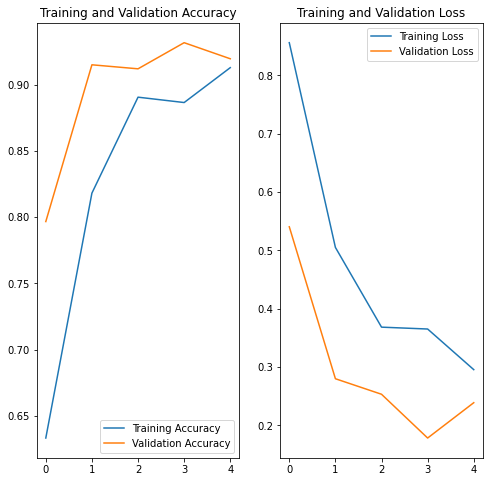

In [52]:
EPOCHS=5
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
 #Saving our model
 filepath="leaf_classifier_model.h5"
 model.save(filepath)

In [54]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img_path = 'C:/Users/HP/OneDrive/Desktop/TarpProject/Training/img1.jpg'
img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
print(predictions)
print("predicted label:",classes[np.argmax(predictions[0])])


1/1 [==============================] - 1s 686ms/step
[[1. 0. 0.]]
predicted label: Pepper__bell


Following is our prediction:
1/1 [==============================] - 0s 78ms/step


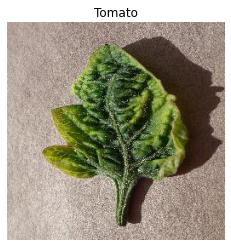

In [62]:
# predicting an image
image_path ="C:/Users/HP/OneDrive/Desktop/TarpProject/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/00a538f3-8421-43ab-9e6f-758d36180dd3___YLCV_NREC 2667.jpg"


new_img = load_img(image_path, target_size=(256, 256))
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = classes[index]

     
        
##Another way
img_class = model.predict(img)
#img_prob = classifier.predict_proba(img)


# convert the predicted outputs to probabilities
img_prob = np.exp(img_class) / np.sum(np.exp(img_class), axis=-1, keepdims=True)


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [56]:
print(img_prob)
#probability
print(img_prob.max())

[[0.21856228 0.2147876  0.5666501 ]]
0.5666501


In [57]:
 confidence = round(100 * (np.max(img_prob[0])), 2)
 print(confidence)

56.67


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image



# Load the test images and make predictions
test_images = []
image_names = []

for filename in os.listdir('trail_dataset'):
    img = image.load_img('trail_dataset/'+filename, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0  # Normalize the image


In [ ]:
#there is some worng here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('trail_dataset',
                                                  target_size=(256, 256),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)


In [ ]:
test_images

In [ ]:
'''def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence'''

def predict(model, img):
    img_array = img
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [ ]:
'''
for i in os.listdir('trail_dataset'):
    ax = plt.subplot(3, 3, i + 1)
    img = image.load_img('trail_dataset/'+i, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0  # Normalize the image
    
    plt.imshow(img[i].numpy().astype("uint8"))
        
    predicted_class, confidence = predict(model, img.numpy())
    actual_class = i
        
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
'''


fig = plt.figure(figsize=(15, 15))

for i, filename in enumerate(os.listdir('trail_dataset')):
    ax = fig.add_subplot(3, 3, i+1)
    img = image.load_img(os.path.join('trail_dataset', filename), target_size=(256, 256))
    img = image.img_to_array(img)
    img = img/255.0  # Normalize the image
    
    ax.imshow(img)
        
    predicted_class, confidence = predict(model, img)
    actual_class = filename
        
    ax.set_title(f"Actual: {actual_class},\nPredicted: {predicted_class}. Confidence: {confidence:.2f}")
    ax.axis("off")


plt.show()


In [64]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/HP/OneDrive/Desktop/TarpProject/Training/models_leaf") + [0]])+1
model.save(f"C:/Users/HP/OneDrive/Desktop/TarpProject/Training/models_leaf/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/HP/OneDrive/Desktop/TarpProject/Training/models_leaf/2\assets


INFO:tensorflow:Assets written to: C:/Users/HP/OneDrive/Desktop/TarpProject/Training/models_leaf/2\assets
